In [76]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
from src import Spotify
from urllib.parse import urlencode, urlparse
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
sp = Spotify()

sp.search()
sp.get_genres()
sp.get_features()
sp.get_recommend(get_bak=True)

reco_sp = Spotify(sp.reco_tracks)
reco_sp.get_features()

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit


In [62]:
sp.sel_tracks.head()

,trackId,trackName,artistIds,artistNames,image
0,3w9HSuLDejveVS9G8Qj8i0,Beer (Prod.Way Ched),0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b27388875b...
1,1CJweyedfMbIab2O3Jc8K8,I'm Sick,2MtHuR0W2idZdF7x4wddqq,GIRIBOY,https://i.scdn.co/image/ab67616d0000b27316c1f7...
2,4Nd7PP3Qnuwjb72dNkbE2f,아마두,0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b27363ee23...
3,5iK8aeAYiyd0eZKfpaCdbI,Sleeping Beauty,0EgAs28dGzlP2rf0q95Y6l,PAUL,https://i.scdn.co/image/ab67616d0000b273165282...


In [63]:
reco_sp.sel_tracks.head()

,trackId,trackName,artistIds,artistName,image,seedId
0,6k0uEbDQAQxOX8JPbkuTTT,DIRTY,6wJGHv6dfPrZxFoZXXwtLO,Miryo,https://i.scdn.co/image/ab67616d0000b273283688...,3w9HSuLDejveVS9G8Qj8i0
1,5D9NOCusyVe8mEY6qDqulu,Duracell,7IWshUcKfJyDWrbiF2XT8J,Kid Milli,https://i.scdn.co/image/ab67616d0000b273ebd55c...,3w9HSuLDejveVS9G8Qj8i0
2,56gnI7SIZbFhiwzfN1ogN4,CHALLAN,1wsoV3RXPkxVz3PwsNRI5K,BewhY,https://i.scdn.co/image/ab67616d0000b2735e08b7...,3w9HSuLDejveVS9G8Qj8i0
3,7kvmOl9he8v0649CG1KjLL,How We Rock,2a3wtqb5oDZFegk1xPJu7K,H1GHR MUSIC,https://i.scdn.co/image/ab67616d0000b27304a3ad...,3w9HSuLDejveVS9G8Qj8i0
4,5UyOL5ZnrGSjLCgQoAyWHT,The Senior - Instrumental,459tVR1zPUmVwOROer0adD,BILL STAX,https://i.scdn.co/image/ab67616d0000b273c88bb1...,3w9HSuLDejveVS9G8Qj8i0


In [99]:
from sklearn.metrics import euclidean_distances as euc

my_features = sp.features.iloc[:, 1:].to_numpy()
reco_features = reco_sp.features.iloc[:,1:].to_numpy()

all_features = np.append(my_features, reco_features, axis=0)

my_features = (my_features - _min) / (_max - _min)
reco_features = (reco_features - _min) / (_max - _min)

In [172]:
chk = euc(my_features, my_features)
chk_idxes = chk[chk != 0].reshape(-1,len(my_features) - 1).mean(axis=1).argsort()

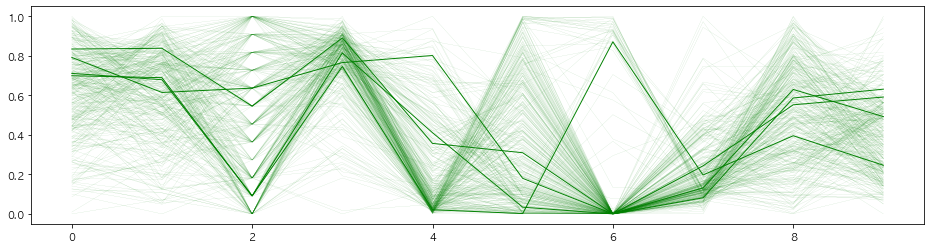

In [173]:
plt.figure(figsize=(16, 4))

plt.plot(reco_features.T, c='g', linewidth=0.05)
plt.plot(my_features[chk_idxes[:]].T, c='g', linewidth=0.95)

plt.show()

In [174]:
chk_features = reco_sp.sel_tracks.copy()
chk_features.reset_index(inplace=True)
chk_features.drop("index", axis=1, inplace=True)
chk_features['similarity'] = euc(reco_features,my_features).mean(axis=1)

chk_features.head()

,trackId,trackName,artistIds,artistName,image,seedId,similarity
0,6k0uEbDQAQxOX8JPbkuTTT,DIRTY,6wJGHv6dfPrZxFoZXXwtLO,Miryo,https://i.scdn.co/image/ab67616d0000b273283688...,3w9HSuLDejveVS9G8Qj8i0,0.843973
1,5D9NOCusyVe8mEY6qDqulu,Duracell,7IWshUcKfJyDWrbiF2XT8J,Kid Milli,https://i.scdn.co/image/ab67616d0000b273ebd55c...,3w9HSuLDejveVS9G8Qj8i0,0.864747
2,56gnI7SIZbFhiwzfN1ogN4,CHALLAN,1wsoV3RXPkxVz3PwsNRI5K,BewhY,https://i.scdn.co/image/ab67616d0000b2735e08b7...,3w9HSuLDejveVS9G8Qj8i0,0.804407
3,7kvmOl9he8v0649CG1KjLL,How We Rock,2a3wtqb5oDZFegk1xPJu7K,H1GHR MUSIC,https://i.scdn.co/image/ab67616d0000b27304a3ad...,3w9HSuLDejveVS9G8Qj8i0,0.617200
4,5UyOL5ZnrGSjLCgQoAyWHT,The Senior - Instrumental,459tVR1zPUmVwOROer0adD,BILL STAX,https://i.scdn.co/image/ab67616d0000b273c88bb1...,3w9HSuLDejveVS9G8Qj8i0,1.020321


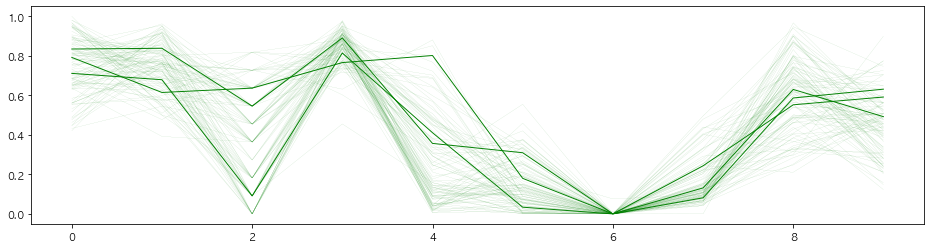

In [175]:
plt.figure(figsize=(16, 4))

plt.plot(reco_features[chk_features.sort_values(by=['similarity'])[:100].index].T, c='g', linewidth=0.05)
plt.plot(my_features[chk_idxes[:-1]].T, c='g', linewidth=0.95)

plt.show()    

In [176]:
chk_features.sort_values(by='similarity')[:100]['seedId'].value_counts()

3w9HSuLDejveVS9G8Qj8i0    35
1CJweyedfMbIab2O3Jc8K8    29
4Nd7PP3Qnuwjb72dNkbE2f    25
5iK8aeAYiyd0eZKfpaCdbI    11
Name: seedId, dtype: int64